1. Basic characteristics of the dataset:
Data types of variables:
tweet                    object
existence                object
existence_confidence    float64
dtype: object

Size of the dataset:
(6027, 3)

Summary statistics:
       existence_confidence
count           6024.000000
mean               0.794113
std                0.180086
min                0.334600
25%                0.658500
50%                0.707300
75%                1.000000
max                1.000000
Columns in the DataFrame:
Index(['tweet', 'existence', 'existence_confidence'], dtype='object')

2. Overall structure of the dataset:


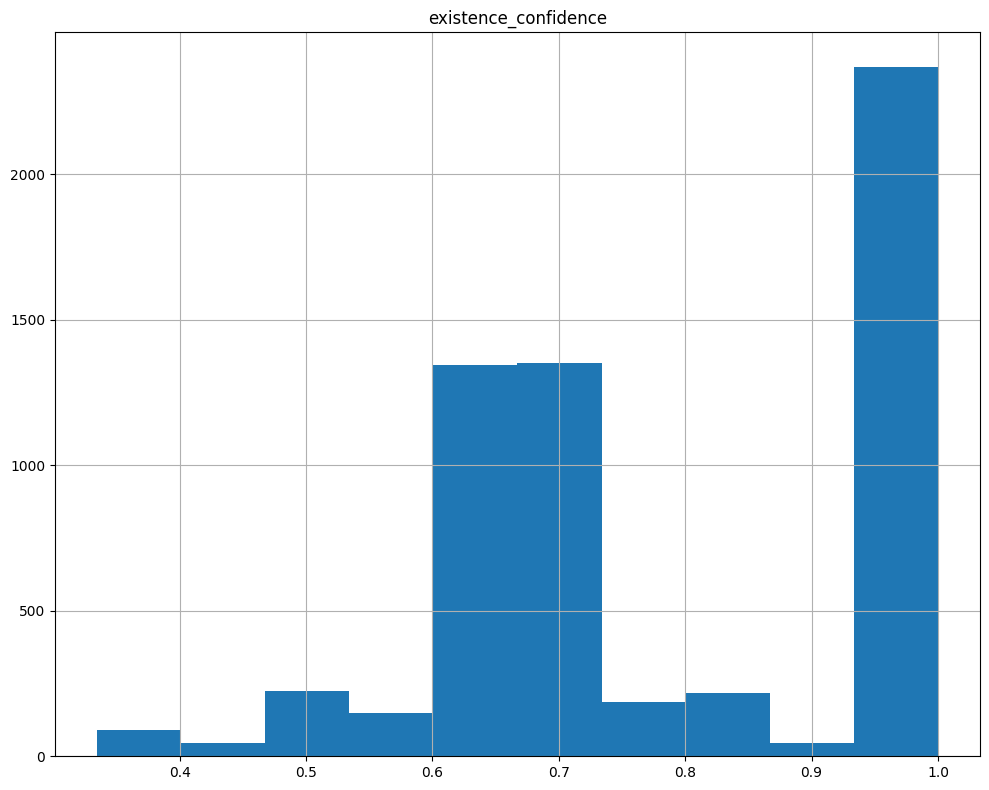


3. Patterns in the data:


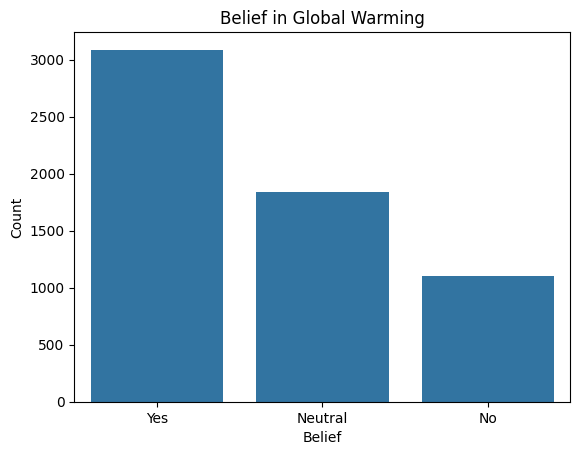


4. Outliers in the data:
Outliers using z-score method:
Empty DataFrame
Columns: [tweet, existence, existence_confidence]
Index: []

Outliers using IQR method:
Empty DataFrame
Columns: [tweet, existence, existence_confidence]
Index: []

5. Missing values:
Number of missing values for each variable:
tweet                   0
existence               0
existence_confidence    3
dtype: int64

6. Correlation between variables:
Correlation Matrix:
                      existence_confidence
existence_confidence                   1.0

7. Variability within each variable:
Variance of each numerical variable:
Variance of existence_confidence variable: 0.03243087287318928


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# =============================================================================
# DATA LOADING AND INITIAL SETUP
# =============================================================================

# Load your dataset
df = pd.read_csv('GlobalWarming_dataset.csv')

# =============================================================================
# 1. BASIC DATASET CHARACTERISTICS
# =============================================================================
print("1. Basic characteristics of the dataset:")
print("Data types of variables:")
print(df.dtypes)
print("\nSize of the dataset:")
print(df.shape)
print("\nSummary statistics:")
print(df.describe())

# =============================================================================
# 2. OVERALL DATASET STRUCTURE AND DISTRIBUTION
# =============================================================================
def visualize_data_distribution(dataset_file):
    try:
        # Read the modified dataset file
        df = pd.read_csv(dataset_file)

        # Check the columns of the DataFrame
        print("Columns in the DataFrame:")
        print(df.columns)

        # Visualize data distribution for numerical variables
        print("\n2. Overall structure of the dataset:")
        df.hist(column='existence_confidence', figsize=(10, 8))
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print("An error occurred:", e)

if __name__ == "__main__":
    dataset_file = "GlobalWarming_dataset.csv"  # Change this to the path of your modified dataset file
    visualize_data_distribution(dataset_file)

# =============================================================================
# 3. DATA PATTERNS ANALYSIS
# =============================================================================
print("\n3. Patterns in the data:")

# Example: Count plot for belief in global warming
sns.countplot(data=df, x='existence')
plt.title('Belief in Global Warming')
plt.xlabel('Belief')
plt.ylabel('Count')
plt.show()

# =============================================================================
# 4. OUTLIER DETECTION
# =============================================================================
print("\n4. Outliers in the data:")
# Check for outliers in existence_confidence column using z-score
z_scores = np.abs((df['existence_confidence'] - df['existence_confidence'].mean()) / df['existence_confidence'].std())
outliers_z_score = df[z_scores > 3]  # Selecting outliers with z-score greater than 3

# Alternatively, you can use IQR to identify outliers
Q1 = df['existence_confidence'].quantile(0.25)
Q3 = df['existence_confidence'].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = df[(df['existence_confidence'] < (Q1 - 1.5 * IQR)) | (df['existence_confidence'] > (Q3 + 1.5 * IQR))]

# Print outliers found using z-score and IQR methods
print("Outliers using z-score method:")
print(outliers_z_score)
print("\nOutliers using IQR method:")
print(outliers_iqr)

# =============================================================================
# 5. MISSING VALUES ANALYSIS
# =============================================================================
print("\n5. Missing values:")
print("Number of missing values for each variable:")
print(df.isnull().sum())

# =============================================================================
# 6. CORRELATION ANALYSIS
# =============================================================================
print("\n6. Correlation between variables:")

# Exclude non-numeric columns before finding correlation matrix
numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns

# Find correlation matrix
correlation_matrix = numeric_df.corr()

# Print correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# =============================================================================
# 7. VARIABILITY ANALYSIS
# =============================================================================
print("\n7. Variability within each variable:")
print("Variance of each numerical variable:")

# Find variance of 'existence_confidence' variable
variance_existence_confidence = df['existence_confidence'].var()

# Print variance
print("Variance of existence_confidence variable:", variance_existence_confidence)

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# =============================================================================
# DATA LOADING AND PREPROCESSING
# =============================================================================

# Load data from CSV file
csv_file = "GlobalWarming_dataset.csv"
data = pd.read_csv(csv_file)

# Handling missing values
data = data.fillna('')

# =============================================================================
# FEATURE AND TARGET SELECTION
# =============================================================================

# Select relevant columns
tweets = data["tweet"]
labels = data["existence"]

# =============================================================================
# LABEL ENCODING
# =============================================================================

# Encode labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# =============================================================================
# DATA SPLITTING
# =============================================================================

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    tweets,
    labels_encoded,
    test_size=0.2,
    random_state=42
)

# =============================================================================
# TEXT VECTORIZATION
# =============================================================================

# Vectorize text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

# =============================================================================
# MODEL TRAINING
# =============================================================================

# Train SVM model
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_vectors, y_train)

# =============================================================================
# MODEL PREDICTION
# =============================================================================

# Predict on test set
y_pred = svm_classifier.predict(X_test_vectors)

# Decode predicted labels back to original categories
y_pred_decoded = label_encoder.inverse_transform(y_pred)

# =============================================================================
# MODEL EVALUATION
# =============================================================================

# Print comprehensive classification report
print("SVM Classification Results:")
print("=" * 50)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

SVM Classification Results:
              precision    recall  f1-score   support

     Neutral       0.62      0.52      0.57       356
          No       0.64      0.47      0.54       214
         Yes       0.70      0.83      0.76       636

    accuracy                           0.67      1206
   macro avg       0.66      0.61      0.62      1206
weighted avg       0.67      0.67      0.66      1206



In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# =============================================================================
# DATA LOADING AND PREPROCESSING
# =============================================================================

# Load data from CSV file
csv_file = "GlobalWarming_dataset.csv"
data = pd.read_csv(csv_file)

# Handling missing values
data = data.fillna('')

# =============================================================================
# FEATURE AND TARGET SELECTION
# =============================================================================

# Select relevant columns
tweets = data["tweet"]
labels = data["existence"]

# =============================================================================
# LABEL ENCODING
# =============================================================================

# Encode labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# =============================================================================
# DATA SPLITTING
# =============================================================================

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    tweets,
    labels_encoded,
    test_size=0.2,
    random_state=42
)

# =============================================================================
# TEXT VECTORIZATION (BAG OF WORDS)
# =============================================================================

# Vectorize text data using Bag of Words
vectorizer = CountVectorizer(max_features=1000)  # Adjust max_features as needed
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

# =============================================================================
# MODEL TRAINING
# =============================================================================

# Train SVM model
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_vectors, y_train)

# =============================================================================
# MODEL PREDICTION
# =============================================================================

# Predict on test set
y_pred = svm_classifier.predict(X_test_vectors)

# Decode predicted labels back to original categories
y_pred_decoded = label_encoder.inverse_transform(y_pred)

# =============================================================================
# MODEL EVALUATION
# =============================================================================

# Print comprehensive classification report
print("SVM Classification Results (Bag of Words):")
print("=" * 50)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

SVM Classification Results (Bag of Words):
              precision    recall  f1-score   support

     Neutral       0.57      0.58      0.58       356
          No       0.66      0.47      0.55       214
         Yes       0.72      0.78      0.75       636

    accuracy                           0.67      1206
   macro avg       0.65      0.61      0.63      1206
weighted avg       0.67      0.67      0.66      1206



In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB  # Import Naive Bayes classifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# =============================================================================
# DATA LOADING AND PREPROCESSING
# =============================================================================

# Load data from CSV file
csv_file = "GlobalWarming_dataset.csv"
data = pd.read_csv(csv_file)

# Handling missing values
data = data.fillna('')

# =============================================================================
# FEATURE AND TARGET SELECTION
# =============================================================================

# Select relevant columns
tweets = data["tweet"]
labels = data["existence"]

# =============================================================================
# LABEL ENCODING
# =============================================================================

# Encode labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# =============================================================================
# DATA SPLITTING
# =============================================================================

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    tweets,
    labels_encoded,
    test_size=0.2,
    random_state=42
)

# =============================================================================
# TEXT VECTORIZATION (TF-IDF)
# =============================================================================

# Vectorize text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

# =============================================================================
# MODEL TRAINING (NAIVE BAYES)
# =============================================================================

# Train Naive Bayes model
naive_bayes_classifier = MultinomialNB()  # Use Multinomial Naive Bayes for text classification
naive_bayes_classifier.fit(X_train_vectors, y_train)

# =============================================================================
# MODEL PREDICTION
# =============================================================================

# Predict on test set
y_pred = naive_bayes_classifier.predict(X_test_vectors)

# Decode predicted labels back to original categories
y_pred_decoded = label_encoder.inverse_transform(y_pred)

# =============================================================================
# MODEL EVALUATION
# =============================================================================

# Print comprehensive classification report
print("Naive Bayes Classification Results (TF-IDF):")
print("=" * 50)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Naive Bayes Classification Results (TF-IDF):
              precision    recall  f1-score   support

     Neutral       0.65      0.43      0.52       356
          No       0.64      0.37      0.47       214
         Yes       0.66      0.87      0.75       636

    accuracy                           0.65      1206
   macro avg       0.65      0.56      0.58      1206
weighted avg       0.65      0.65      0.63      1206



In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer  # Import CountVectorizer for BoW
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB  # Import Naive Bayes classifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# =============================================================================
# DATA LOADING AND PREPROCESSING
# =============================================================================

# Load data from CSV file
csv_file = "GlobalWarming_dataset.csv"
data = pd.read_csv(csv_file)

# Handling missing values
data = data.fillna('')

# =============================================================================
# FEATURE AND TARGET SELECTION
# =============================================================================

# Select relevant columns
tweets = data["tweet"]
labels = data["existence"]

# =============================================================================
# LABEL ENCODING
# =============================================================================

# Encode labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# =============================================================================
# DATA SPLITTING
# =============================================================================

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    tweets,
    labels_encoded,
    test_size=0.2,
    random_state=42
)

# =============================================================================
# TEXT VECTORIZATION (BAG OF WORDS)
# =============================================================================

# Vectorize text data using Bag of Words
vectorizer = CountVectorizer(max_features=1000)  # Adjust max_features as needed
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

# =============================================================================
# MODEL TRAINING (NAIVE BAYES)
# =============================================================================

# Train Naive Bayes model
naive_bayes_classifier = MultinomialNB()  # Use Multinomial Naive Bayes for text classification
naive_bayes_classifier.fit(X_train_vectors, y_train)

# =============================================================================
# MODEL PREDICTION
# =============================================================================

# Predict on test set
y_pred = naive_bayes_classifier.predict(X_test_vectors)

# Decode predicted labels back to original categories
y_pred_decoded = label_encoder.inverse_transform(y_pred)

# =============================================================================
# MODEL EVALUATION
# =============================================================================

# Print comprehensive classification report
print("Naive Bayes Classification Results (Bag of Words):")
print("=" * 50)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Naive Bayes Classification Results (Bag of Words):
              precision    recall  f1-score   support

     Neutral       0.61      0.57      0.59       356
          No       0.53      0.66      0.59       214
         Yes       0.74      0.71      0.73       636

    accuracy                           0.66      1206
   macro avg       0.63      0.65      0.64      1206
weighted avg       0.67      0.66      0.66      1206



In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  # Import Logistic Regression classifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# =============================================================================
# DATA LOADING AND PREPROCESSING
# =============================================================================

# Load data from CSV file
csv_file = "GlobalWarming_dataset.csv"
data = pd.read_csv(csv_file)

# Handling missing values
data = data.fillna('')

# =============================================================================
# FEATURE AND TARGET SELECTION
# =============================================================================

# Select relevant columns
tweets = data["tweet"]
labels = data["existence"]

# =============================================================================
# LABEL ENCODING
# =============================================================================

# Encode labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# =============================================================================
# DATA SPLITTING
# =============================================================================

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    tweets,
    labels_encoded,
    test_size=0.2,
    random_state=42
)

# =============================================================================
# TEXT VECTORIZATION (TF-IDF)
# =============================================================================

# Vectorize text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

# =============================================================================
# MODEL TRAINING (LOGISTIC REGRESSION)
# =============================================================================

# Train Logistic Regression model
logistic_regression_classifier = LogisticRegression(max_iter=1000)  # Initialize Logistic Regression classifier
logistic_regression_classifier.fit(X_train_vectors, y_train)

# =============================================================================
# MODEL PREDICTION
# =============================================================================

# Predict on test set
y_pred = logistic_regression_classifier.predict(X_test_vectors)

# Decode predicted labels back to original categories
y_pred_decoded = label_encoder.inverse_transform(y_pred)

# =============================================================================
# MODEL EVALUATION
# =============================================================================

# Print comprehensive classification report
print("Logistic Regression Classification Results (TF-IDF):")
print("=" * 50)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Logistic Regression Classification Results (TF-IDF):
              precision    recall  f1-score   support

     Neutral       0.65      0.53      0.58       356
          No       0.67      0.47      0.55       214
         Yes       0.70      0.84      0.77       636

    accuracy                           0.68      1206
   macro avg       0.67      0.62      0.63      1206
weighted avg       0.68      0.68      0.67      1206



In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer  # Import CountVectorizer for BoW
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  # Import Logistic Regression classifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# =============================================================================
# DATA LOADING AND PREPROCESSING
# =============================================================================

# Load data from CSV file
csv_file = "GlobalWarming_dataset.csv"
data = pd.read_csv(csv_file)

# Handling missing values
data = data.fillna('')

# =============================================================================
# FEATURE AND TARGET SELECTION
# =============================================================================

# Select relevant columns
tweets = data["tweet"]
labels = data["existence"]

# =============================================================================
# LABEL ENCODING
# =============================================================================

# Encode labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# =============================================================================
# DATA SPLITTING
# =============================================================================

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    tweets,
    labels_encoded,
    test_size=0.2,
    random_state=42
)

# =============================================================================
# TEXT VECTORIZATION (BAG OF WORDS)
# =============================================================================

# Vectorize text data using Bag of Words
vectorizer = CountVectorizer(max_features=1000)  # Adjust max_features as needed
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

# =============================================================================
# MODEL TRAINING (LOGISTIC REGRESSION)
# =============================================================================

# Train Logistic Regression model
logistic_regression_classifier = LogisticRegression(max_iter=1000)  # Initialize Logistic Regression classifier
logistic_regression_classifier.fit(X_train_vectors, y_train)

# =============================================================================
# MODEL PREDICTION
# =============================================================================

# Predict on test set
y_pred = logistic_regression_classifier.predict(X_test_vectors)

# Decode predicted labels back to original categories
y_pred_decoded = label_encoder.inverse_transform(y_pred)

# =============================================================================
# MODEL EVALUATION
# =============================================================================

# Print comprehensive classification report
print("Logistic Regression Classification Results (Bag of Words):")
print("=" * 50)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Logistic Regression Classification Results (Bag of Words):
              precision    recall  f1-score   support

     Neutral       0.60      0.58      0.59       356
          No       0.64      0.49      0.56       214
         Yes       0.73      0.80      0.76       636

    accuracy                           0.68      1206
   macro avg       0.66      0.62      0.64      1206
weighted avg       0.68      0.68      0.68      1206



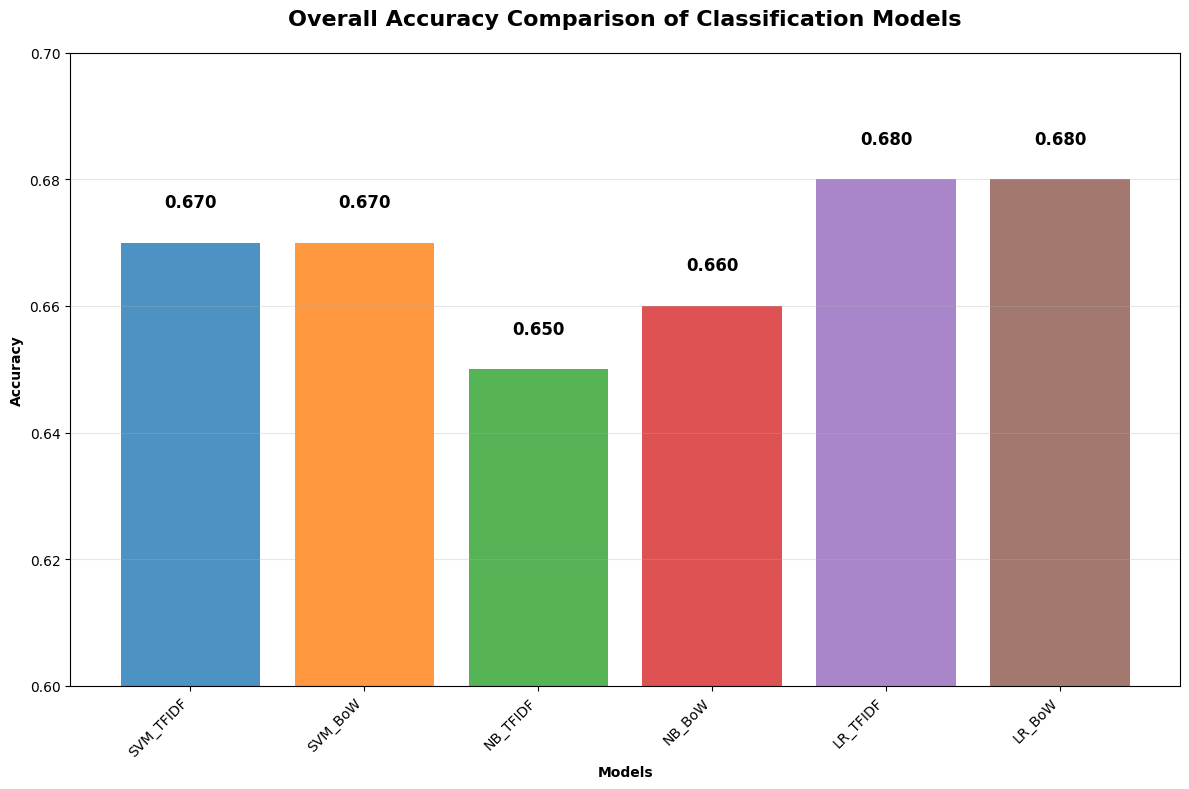

ACCURACY COMPARISON SUMMARY
Best Accuracy: LR_TFIDF - 0.680


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# =============================================================================
# DATA PREPARATION
# =============================================================================

models_data = {
    'SVM_TFIDF': {'accuracy': 0.67},
    'SVM_BoW': {'accuracy': 0.67},
    'NB_TFIDF': {'accuracy': 0.65},
    'NB_BoW': {'accuracy': 0.66},
    'LR_TFIDF': {'accuracy': 0.68},
    'LR_BoW': {'accuracy': 0.68}
}

# =============================================================================
# VISUALIZATION SETUP
# =============================================================================

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
models = list(models_data.keys())

plt.figure(figsize=(12, 8))

# =============================================================================
# ACCURACY COMPARISON PLOT
# =============================================================================

accuracies = [models_data[model]['accuracy'] for model in models]
bars = plt.bar(models, accuracies, color=colors, alpha=0.8)

plt.title('Overall Accuracy Comparison of Classification Models', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Accuracy', fontweight='bold')
plt.ylim(0.6, 0.7)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
             f'{acc:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

# =============================================================================
# SUMMARY STATISTICS
# =============================================================================

print("=" * 50)
print("ACCURACY COMPARISON SUMMARY")
print("=" * 50)
best_acc_model = max(models_data, key=lambda x: models_data[x]['accuracy'])
best_acc = models_data[best_acc_model]['accuracy']
print(f"Best Accuracy: {best_acc_model} - {best_acc:.3f}")

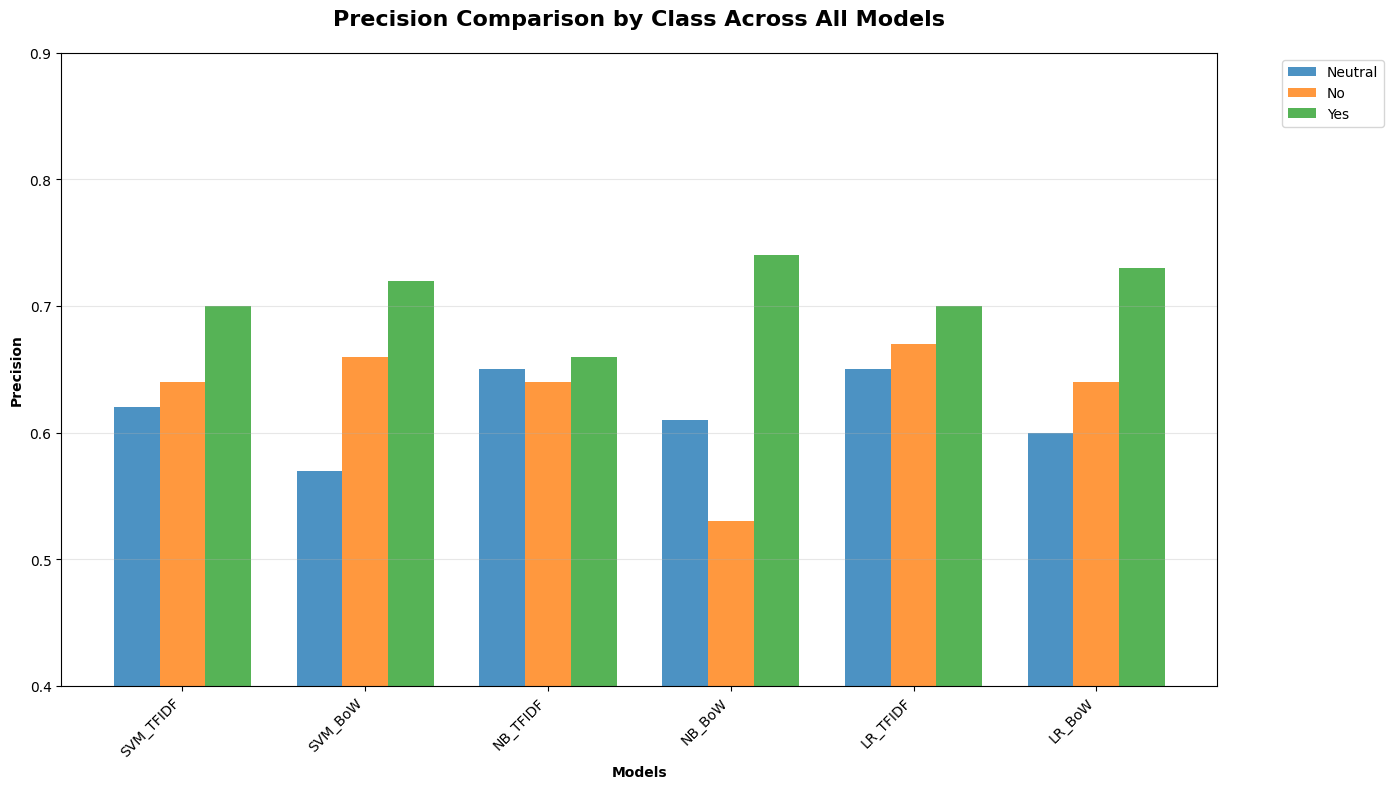

PRECISION COMPARISON SUMMARY
Best Precision for Neutral: NB_TFIDF   - 0.650
Best Precision for No     : LR_TFIDF   - 0.670
Best Precision for Yes    : NB_BoW     - 0.740


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# =============================================================================
# DATA PREPARATION
# =============================================================================

models_data = {
    'SVM_TFIDF': {
        'Neutral': {'precision': 0.62}, 'No': {'precision': 0.64}, 'Yes': {'precision': 0.70}
    },
    'SVM_BoW': {
        'Neutral': {'precision': 0.57}, 'No': {'precision': 0.66}, 'Yes': {'precision': 0.72}
    },
    'NB_TFIDF': {
        'Neutral': {'precision': 0.65}, 'No': {'precision': 0.64}, 'Yes': {'precision': 0.66}
    },
    'NB_BoW': {
        'Neutral': {'precision': 0.61}, 'No': {'precision': 0.53}, 'Yes': {'precision': 0.74}
    },
    'LR_TFIDF': {
        'Neutral': {'precision': 0.65}, 'No': {'precision': 0.67}, 'Yes': {'precision': 0.70}
    },
    'LR_BoW': {
        'Neutral': {'precision': 0.60}, 'No': {'precision': 0.64}, 'Yes': {'precision': 0.73}
    }
}

# =============================================================================
# VISUALIZATION SETUP
# =============================================================================

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
models = list(models_data.keys())
classes = ['Neutral', 'No', 'Yes']

plt.figure(figsize=(14, 8))

# =============================================================================
# PRECISION COMPARISON BY CLASS
# =============================================================================

x = np.arange(len(models))
width = 0.25

for i, class_name in enumerate(classes):
    precisions = [models_data[model][class_name]['precision'] for model in models]
    plt.bar(x + i*width, precisions, width, label=class_name, alpha=0.8)

plt.title('Precision Comparison by Class Across All Models', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Precision', fontweight='bold')
plt.xticks(x + width, models, rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(0.4, 0.9)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# SUMMARY STATISTICS
# =============================================================================

print("=" * 50)
print("PRECISION COMPARISON SUMMARY")
print("=" * 50)
for class_name in classes:
    best_model = max(models_data, key=lambda x: models_data[x][class_name]['precision'])
    best_precision = models_data[best_model][class_name]['precision']
    print(f"Best Precision for {class_name:7}: {best_model:10} - {best_precision:.3f}")

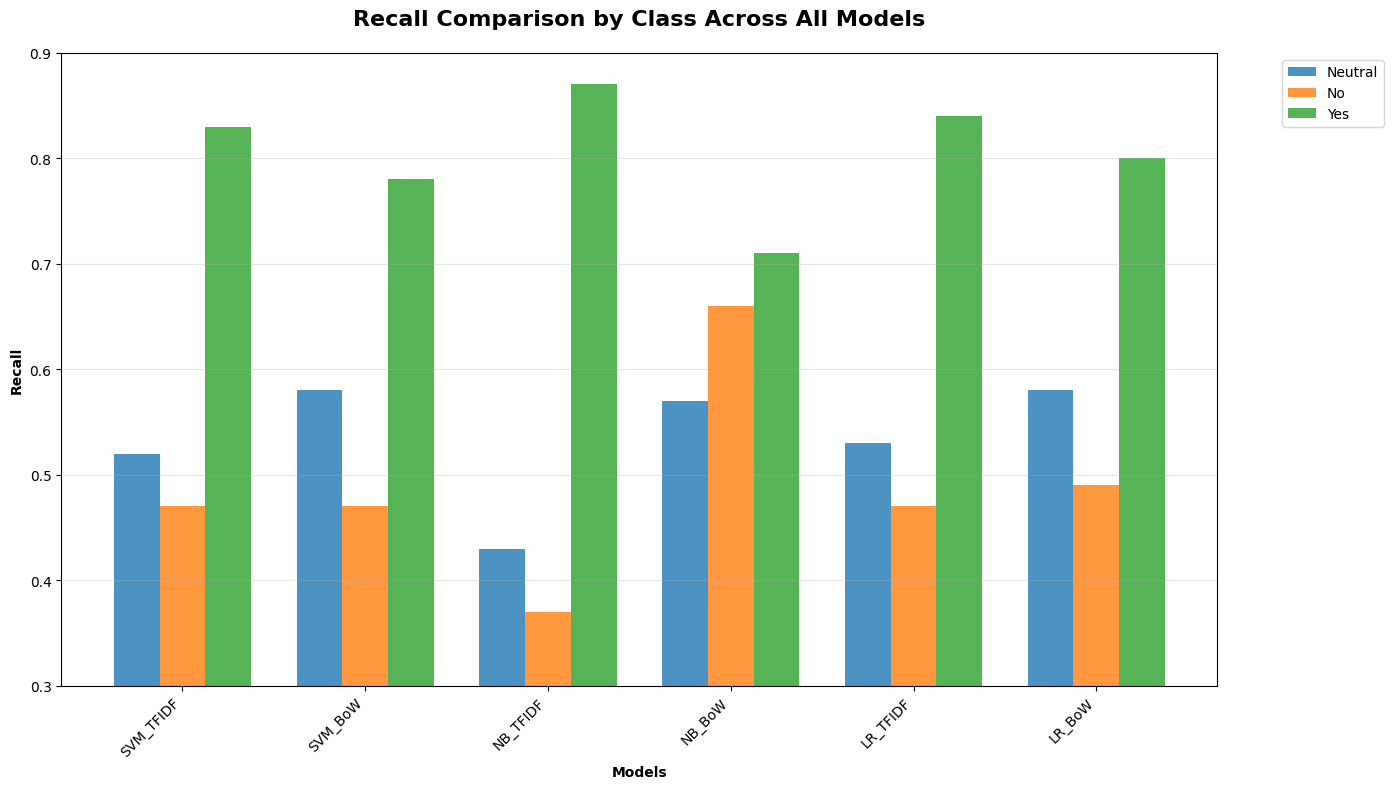

RECALL COMPARISON SUMMARY
Best Recall for Neutral: SVM_BoW    - 0.580
Best Recall for No     : NB_BoW     - 0.660
Best Recall for Yes    : NB_TFIDF   - 0.870


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# =============================================================================
# DATA PREPARATION
# =============================================================================

models_data = {
    'SVM_TFIDF': {
        'Neutral': {'recall': 0.52}, 'No': {'recall': 0.47}, 'Yes': {'recall': 0.83}
    },
    'SVM_BoW': {
        'Neutral': {'recall': 0.58}, 'No': {'recall': 0.47}, 'Yes': {'recall': 0.78}
    },
    'NB_TFIDF': {
        'Neutral': {'recall': 0.43}, 'No': {'recall': 0.37}, 'Yes': {'recall': 0.87}
    },
    'NB_BoW': {
        'Neutral': {'recall': 0.57}, 'No': {'recall': 0.66}, 'Yes': {'recall': 0.71}
    },
    'LR_TFIDF': {
        'Neutral': {'recall': 0.53}, 'No': {'recall': 0.47}, 'Yes': {'recall': 0.84}
    },
    'LR_BoW': {
        'Neutral': {'recall': 0.58}, 'No': {'recall': 0.49}, 'Yes': {'recall': 0.80}
    }
}

# =============================================================================
# VISUALIZATION SETUP
# =============================================================================

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
models = list(models_data.keys())
classes = ['Neutral', 'No', 'Yes']

plt.figure(figsize=(14, 8))

# =============================================================================
# RECALL COMPARISON BY CLASS
# =============================================================================

x = np.arange(len(models))
width = 0.25

for i, class_name in enumerate(classes):
    recalls = [models_data[model][class_name]['recall'] for model in models]
    plt.bar(x + i*width, recalls, width, label=class_name, alpha=0.8)

plt.title('Recall Comparison by Class Across All Models', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Recall', fontweight='bold')
plt.xticks(x + width, models, rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(0.3, 0.9)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# SUMMARY STATISTICS
# =============================================================================

print("=" * 50)
print("RECALL COMPARISON SUMMARY")
print("=" * 50)
for class_name in classes:
    best_model = max(models_data, key=lambda x: models_data[x][class_name]['recall'])
    best_recall = models_data[best_model][class_name]['recall']
    print(f"Best Recall for {class_name:7}: {best_model:10} - {best_recall:.3f}")

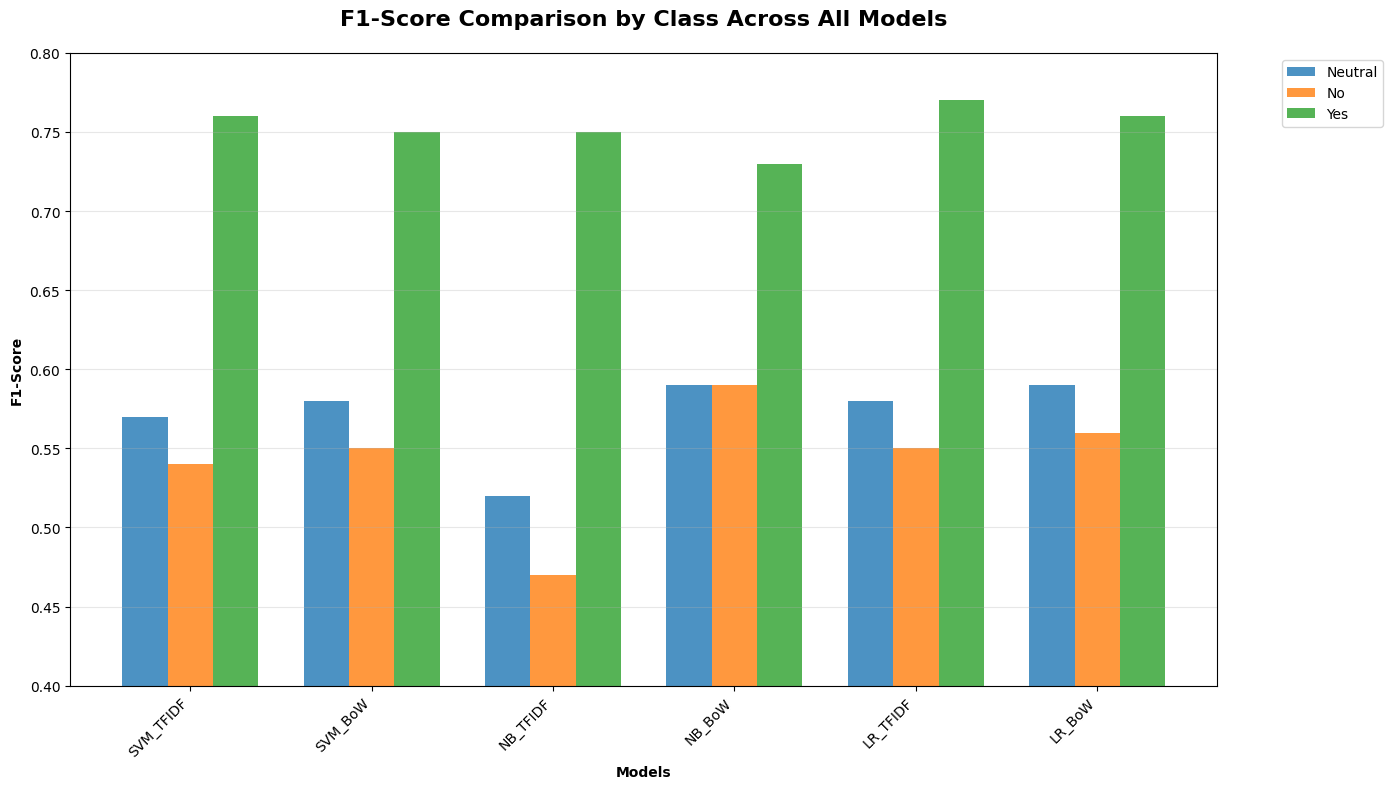

F1-SCORE COMPARISON SUMMARY
Best F1-Score for Neutral: NB_BoW     - 0.590
Best F1-Score for No     : NB_BoW     - 0.590
Best F1-Score for Yes    : LR_TFIDF   - 0.770


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# =============================================================================
# DATA PREPARATION
# =============================================================================

models_data = {
    'SVM_TFIDF': {
        'Neutral': {'f1': 0.57}, 'No': {'f1': 0.54}, 'Yes': {'f1': 0.76}
    },
    'SVM_BoW': {
        'Neutral': {'f1': 0.58}, 'No': {'f1': 0.55}, 'Yes': {'f1': 0.75}
    },
    'NB_TFIDF': {
        'Neutral': {'f1': 0.52}, 'No': {'f1': 0.47}, 'Yes': {'f1': 0.75}
    },
    'NB_BoW': {
        'Neutral': {'f1': 0.59}, 'No': {'f1': 0.59}, 'Yes': {'f1': 0.73}
    },
    'LR_TFIDF': {
        'Neutral': {'f1': 0.58}, 'No': {'f1': 0.55}, 'Yes': {'f1': 0.77}
    },
    'LR_BoW': {
        'Neutral': {'f1': 0.59}, 'No': {'f1': 0.56}, 'Yes': {'f1': 0.76}
    }
}

# =============================================================================
# VISUALIZATION SETUP
# =============================================================================

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
models = list(models_data.keys())
classes = ['Neutral', 'No', 'Yes']

plt.figure(figsize=(14, 8))

# =============================================================================
# F1-SCORE COMPARISON BY CLASS
# =============================================================================

x = np.arange(len(models))
width = 0.25

for i, class_name in enumerate(classes):
    f1_scores = [models_data[model][class_name]['f1'] for model in models]
    plt.bar(x + i*width, f1_scores, width, label=class_name, alpha=0.8)

plt.title('F1-Score Comparison by Class Across All Models', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Models', fontweight='bold')
plt.ylabel('F1-Score', fontweight='bold')
plt.xticks(x + width, models, rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(0.4, 0.8)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# SUMMARY STATISTICS
# =============================================================================

print("=" * 50)
print("F1-SCORE COMPARISON SUMMARY")
print("=" * 50)
for class_name in classes:
    best_model = max(models_data, key=lambda x: models_data[x][class_name]['f1'])
    best_f1 = models_data[best_model][class_name]['f1']
    print(f"Best F1-Score for {class_name:7}: {best_model:10} - {best_f1:.3f}")

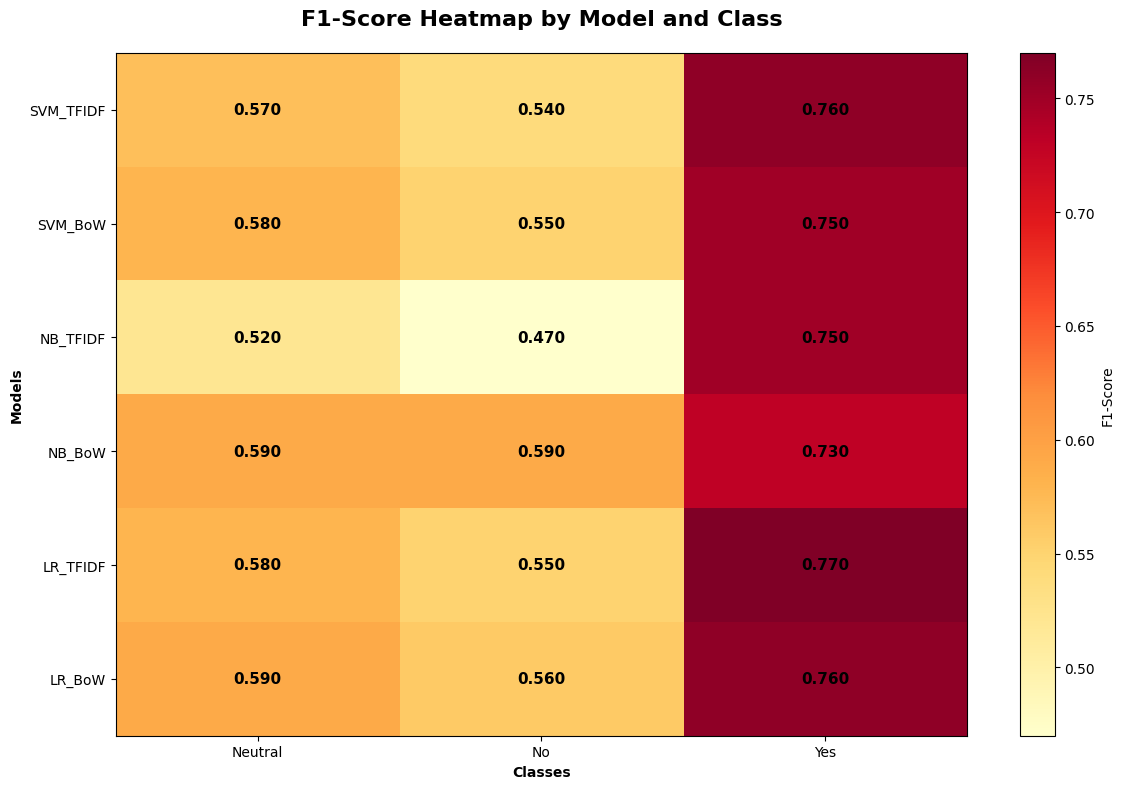

F1-SCORE HEATMAP SUMMARY
F1-Scores Matrix:
Model           | Neutral |   No   |  Yes   
----------------------------------------
SVM_TFIDF       | 0.570 | 0.540 | 0.760
SVM_BoW         | 0.580 | 0.550 | 0.750
NB_TFIDF        | 0.520 | 0.470 | 0.750
NB_BoW          | 0.590 | 0.590 | 0.730
LR_TFIDF        | 0.580 | 0.550 | 0.770
LR_BoW          | 0.590 | 0.560 | 0.760


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# =============================================================================
# DATA PREPARATION
# =============================================================================

models_data = {
    'SVM_TFIDF': {'Neutral': {'f1': 0.57}, 'No': {'f1': 0.54}, 'Yes': {'f1': 0.76}},
    'SVM_BoW': {'Neutral': {'f1': 0.58}, 'No': {'f1': 0.55}, 'Yes': {'f1': 0.75}},
    'NB_TFIDF': {'Neutral': {'f1': 0.52}, 'No': {'f1': 0.47}, 'Yes': {'f1': 0.75}},
    'NB_BoW': {'Neutral': {'f1': 0.59}, 'No': {'f1': 0.59}, 'Yes': {'f1': 0.73}},
    'LR_TFIDF': {'Neutral': {'f1': 0.58}, 'No': {'f1': 0.55}, 'Yes': {'f1': 0.77}},
    'LR_BoW': {'Neutral': {'f1': 0.59}, 'No': {'f1': 0.56}, 'Yes': {'f1': 0.76}}
}

# =============================================================================
# VISUALIZATION SETUP
# =============================================================================

models = list(models_data.keys())
classes = ['Neutral', 'No', 'Yes']

plt.figure(figsize=(12, 8))

# =============================================================================
# F1-SCORE HEATMAP
# =============================================================================

# Create heatmap data
heatmap_data = []
for model in models:
    row = [models_data[model][cls]['f1'] for cls in classes]
    heatmap_data.append(row)

heatmap_data = np.array(heatmap_data)
im = plt.imshow(heatmap_data, cmap='YlOrRd', aspect='auto')

plt.title('F1-Score Heatmap by Model and Class', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Classes', fontweight='bold')
plt.ylabel('Models', fontweight='bold')
plt.xticks(range(len(classes)), classes)
plt.yticks(range(len(models)), models)

# Add text annotations
for i in range(len(models)):
    for j in range(len(classes)):
        plt.text(j, i, f'{heatmap_data[i, j]:.3f}',
                ha="center", va="center", color="black", fontweight='bold', fontsize=11)

plt.colorbar(im, label='F1-Score')

plt.tight_layout()
plt.show()

# =============================================================================
# SUMMARY STATISTICS
# =============================================================================

print("=" * 50)
print("F1-SCORE HEATMAP SUMMARY")
print("=" * 50)
print("F1-Scores Matrix:")
print("Model           | Neutral |   No   |  Yes   ")
print("-" * 40)
for i, model in enumerate(models):
    scores = " | ".join([f"{heatmap_data[i,j]:.3f}" for j in range(len(classes))])
    print(f"{model:15} | {scores}")